Course: <span style="color:crimson"> Current and Future Trends in Extreme Weather </span> (EAS-G574 - Indiana University - Fall 2022) <br />
Instructor: <span style="color:crimson"> Prof. Travis O'Brien </span> <br />
Student: Trung Nguyen
<p style="text-align: center;">
<span style="color:blue; font-size:1.5em"> GRAD Homework 3 </span> <br />
<span style="color:black; font-size:1.5em"> Maximum Likelihood Estimation </span> <br />
Due: Wed Nov 16, 2022 11:29 pm <br />
</p>

**<span style="color:crimson">  The goal : </span> using maximum likelihood estimation to determine non-stationary GEV parameter values from fake data and real data.**

<span style="color:blue; font-size:1.5em"> **0. Getting set up** (0 points)  </span>  <br />
* Create this notebook
* And, also, for clarity, I keep all "imported" libraries and "imported" self-written functions in the cell #1 below.

In [1]:
# For clarity, I will keep all imported libraries here:
import numpy as np
import matplotlib.pyplot as plt

# All of my GEV functions written in HW2 are stored in gev_functions.py
import gev_functions

# Use scipy.genextreme to verify at some steps
from scipy.stats import genextreme

# Use scipy.optimize.minimize() for question #4
from scipy.optimize import minimize

# Use csv reader from pandas for reading data of question #5
import pandas as pd

# For add the KDE to plot
from scipy import stats

<span style="color:blue; font-size:1.5em"> **1. Make ‘libraries’ out of your HW2 code** (20 points)  </span>  <br />
<span style="color:red"> Goal: </span> make a library of self-written codes in HW2 that can be imported in this HW. <br />

* My homework 2 assignment file is copied in this directory with file name:
**16Oct2022_Homework_02_Redo_Final.ipynb**

* All of my function definitions are copied into a library file:
**gev_functions.py**

* All the function definitions in the copy of homework 2 are removed (i.e., no more "def" in the mentioned HW2 file)

* My functions are imported into my HW2 notebook/code. Re-run the HW2 file showed that **all the HW2 tests pass**. Now, in the modified HW2 file, with *import gev_functions* at the start, self-written functions can be used by, e.g., calling *gev_functions.gev_pdf()*. 

* Notice of a change that I had to make to the code to get them to pass: Based on [the HW2 key provided by Prof. Travis](http://a474.hoosierwxandclimate.org/2022/E474_574/grad_homework_keys/grad_homework_2_key.html), I revised my *gev_pdf()* function as can be seen in library file *gev_functions.py* (with careful comments from line 40 to 60).
While the PDF formula provided in summary table of [the Wikipedia website](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution) is correct, the PDF formula discussed in Specification section is lack of * $1/\sigma$. I corrected this point in my *gev_pdf()* function and all the tests with HW2 now passed (i.e., include the "weird" behavior of PDF plot for question 5 of HW2 that I discussed in a short discussion with Prof. Travis last time). 

<span style="color:blue; font-size:1.5em"> **2. Generate samples from a non-stationary GEV distribution** (20 points)  </span>  <br />
* <span style="color:red"> Goal: </span> For validating the maximum likelihood method, we’ll want to use a dataset where we know what the answer is. This problem creates that dataset.
* The code is provided in #cell 2 and the discusion is presented in the following markdown cell.
* To faciliate the evalutaion process of this HW, the functions that written for this HW are kept in this notebook (i.e., not move to gev_functions.py).

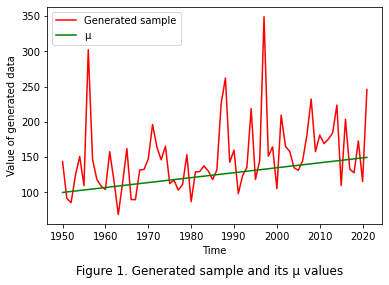

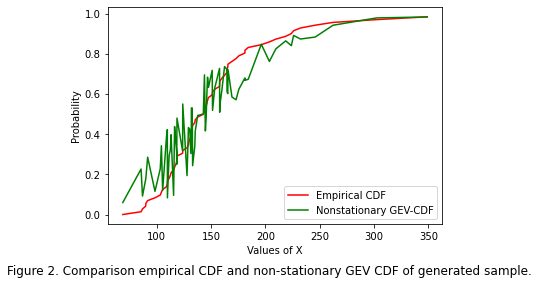

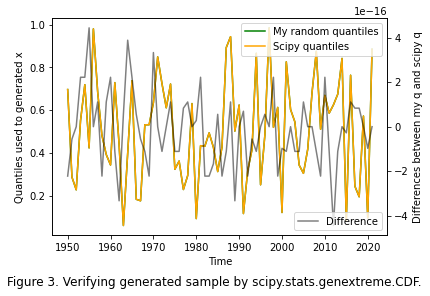

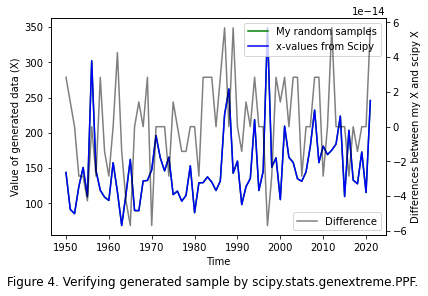

In [2]:
# A function that generates NS-GEV samples 
def gev_ns_samples(t, cmu, mu0, sigma, xi) :
    
    # Sample from a random uniform distribution
    q = np.random.uniform(0,1,len(t))

    # Use my non-stationary Quantile Function
    out = gev_functions.gev_ns_qf(q, t, cmu, mu0, sigma, xi)

    return out, q
#
# Main part (just make sure it's different from functions)
#            
if __name__=="__main__":
    
    # Generate a ‘time’ variable corresponding to each of the 72 years
    t=np.arange(1950,2022)

    # Thank for comment from Prof.Travis to move this np.random.seed to main code
    np.random.seed(123)
    
    # For this problem, use parameters as Prof. Travis provided
    cmu = 0.7       
    sigma = 41
    xi = 0.1
    mu0 = 100 - t[0]*cmu # choose μ0 such that it has a value of 100 at the year 1950
    
    # Use function gev_ns_samples to get the sample
    x,q = gev_ns_samples(t, cmu, mu0, sigma, xi)
        
    # Plot data series to see (the 1st step of any analysis)   
    mu = ( cmu * t ) + mu0 # I want to see mu !
    plt.plot(t, x, c='r', label='Generated sample')
    plt.plot(t, mu, c='g', label='\u03BC')
    plt.xlabel('Time')
    plt.ylabel('Value of generated data')
    plt.legend()
    
    caption='Figure 1. Generated sample and its \u03BC values'
    plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    
    # Verify that this approach is sampling from the nonstationary distribution as expected
    
    # ==== (1) Compare empirical CDF and parameterized GEV CDF  ==== # 
 
    # Empirical CDF
    plt.plot(np.sort(x), np.linspace(0, 1, len(x), endpoint=False), c='r', label='Empirical CDF')
    # Parameterized CDF
    cdf = gev_functions.gev_ns_cdf(x, t, cmu, mu0, sigma, xi)
    x_p, cdf_p = zip(*sorted(zip(x, cdf)))
    plt.plot(x_p, cdf_p, c='g', label='Nonstationary GEV-CDF')
    
    plt.xlabel('Values of X')
    plt.ylabel('Probability')
    plt.legend()
    
    caption='Figure 2. Comparison empirical CDF and non-stationary GEV CDF of generated sample.'
    plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    
    # ==== (2) Count number of points over chosen quantiles  ==== # 
    # It's like "modified" Q-Q plot, based on the idea suggested by Prof. Travis
    # Chose few lines of quantiles and count the number of points above/below them
    # Compare between e-CDF and GEV-CDF
    #x_test = np.arange(np.nanmin(x),np.nanmax(x),10)
    #print (x_test)
    #print (np.percentile(x,90))
    
    # Extra TECHNICAL verifications
    # Verification of my generated samples by scipy.stats
    
    # ==== (3) By quantiles ==== # 
    # Pre-define scipy quantiles
    scipy_q = np.zeros_like(q) 
    # Get the CDF based on generated samples using stats.genextreme.cdf
    for i in np.arange(len(t)) :
        scipy_q[i]=genextreme.cdf(x[i], -xi, loc=mu[i], scale=sigma)

    # Plot my quantile and retrieved q from scipy to compare
    fig, ax = plt.subplots()
    ax.plot(t, q, c='g', label='My random quantiles')
    ax.plot(t, scipy_q, c='orange', label='Scipy quantiles')
    ax.legend(loc='upper right')
    ax.set_xlabel('Time')
    ax.set_ylabel('Quantiles used to generated x')
    
    # Plot the difference (should be ~0)
    ax2 = ax.twinx()
    ax2.plot(t, q - scipy_q, color='k', label='Difference', alpha=0.5)
    ax2.legend(loc = 'lower right')
    ax2.set_ylabel('Differences between my q and scipy q')
    
    caption='Figure 3. Verifying generated sample by scipy.stats.genextreme.CDF.'
    plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    
    # ==== (4) By x-values itself ==== #    
    # Pre-define scipy data array
    scipy_x = np.zeros_like(x) 
    # Get the generated samples using stats.genextreme.ppf
    for i in np.arange(len(t)) :
        scipy_x[i]=genextreme.ppf(q[i], c=-xi, loc=mu[i], scale=sigma)
    
    # Plot my x-values and retrieved x from scipy to compare
    fig, ax = plt.subplots()
    ax.plot(t, x, c='g', label='My random samples')
    ax.plot(t, scipy_x, c='b', label='x-values from Scipy')
    ax.legend(loc='upper right')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value of generated data (X)')
    
    # Plot the difference (should be ~0)
    ax2 = ax.twinx()
    ax2.plot(t, x - scipy_x, color='k', label='Difference', alpha=0.5)
    ax2.legend(loc = 'lower right')
    ax2.set_ylabel('Differences between my X and scipy X')
    
    caption='Figure 4. Verifying generated sample by scipy.stats.genextreme.PPF.'
    plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()

**Discusion :**

**Figure 1** shows my generated sample as a timeseries from 1950 to 2021 (i.e., red line).
The green line shows the values of $\mu$ to make sure it starts from 100 and with $c_{\mu}$ of 0.7, it should equal ~150 in 2021.
This is just simple step for any analysis (i.e., plotting the data series).
And, from Figure 1, we can see that there are three "peak" values higher than 250 in 1956, 1988 and 1997.
Other values of the generated sample varies in the range of about 80 to 220.

In order to verify that the generated sample is from the nonstationary distribution as expected, **Figure 2** presents the empirical CDF (red line) in comparison with the non-stationary GEV CDF (green line).
As expected, the parameterized non-stationary GEV CDF line (green line) varies around the empirical CDF (red line).
Nevertheless, the variation is stronger than I expected (i.e., I expect green line is somehow smooth like the red line).
The test with other large samples (not shown, saved in other temporary codes) shows the same behavior.
It's an interesting point but I don't have a clear explanation for this, now.
I like the idea of "modified" Q-Q plot (i.e., chose few lines of quantiles and count the number of points above/below them to compare between e-CDF and GEV-CDF).
I tried it but there are still confused points, therefore, it was presented here.

For technical verification of my generated sample, I use **scipy.stats.genextreme** to verify both my generated sample values (i.e., x values) and its quantiles (i.e., q values) as shown in **Figure 3** and **Figure 4**.
The difference line (i.e., gray lines in these figures) shows very small value (i.e., 1E-14 and 1E-16), or near zero value.
Indeed, the series of q-values (in Figure 3) and x-values (in Figure 4) generated by scipy package overlaps my generated data series. 

<span style="color:blue; font-size:1.5em"> **3. Write a function to calculate the negative log-likelihood** (20 points)  </span>  <br />
* <span style="color:red"> Goal: </span> Write a function to calculate the negative of the log-likelihood of a set of data, given a set of nonstationary GEV parameters.
* The code is provided in #cell 3 with the function *gev_ns_log_likelihood(params, x, t)* is written as required. The discusion is presented in the following markdown cell.

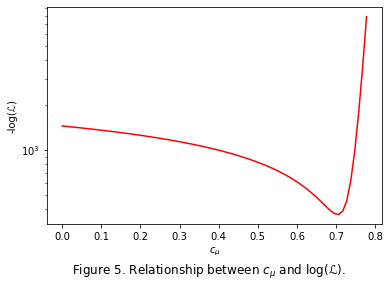

/home/jupyter-trqnguye@iu.edu/G574-homework3/gev_functions.py:61: RuntimeWarning: invalid value encountered in double_scalars
  t = (1 + xi * s)**(-1 / xi)


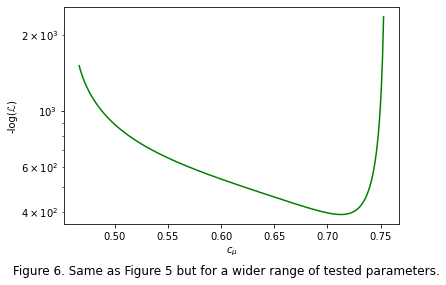

In [3]:
# Function to calculate the negative of the log-likelihood
def gev_ns_log_likelihood(params, x, t) :
    
    # Start with log-likelihood L = 0
    L = 0
    
    # Loops for each time step of data
    for i in np.arange(len(t)) :
        
        # Use my non-stationary GEV PDF
        p = gev_functions.gev_ns_pdf(x[i], t[i], params[0], params[1], params[2], params[3])
        
        # Update log-likelihood
        L = L + np.log(p)
        
    return -L
#
# Main part (just make sure it's different from functions)
#            
if __name__=="__main__":
    
    # An array of nonstationary GEV distribution parameters
    params = [cmu, mu0, sigma, xi]
    
    # Calculate the negative of the log-likelihood
    nll = gev_ns_log_likelihood(params, x, t)
    
    # Verification of the negative log-likelihood function    
    # ==== (1) A graph of −log(ℒ) vs cmu ==== #

    # A range of cmu to test
    cmu_test = np.linspace(0,1,100)
    # Get the range of −log(ℒ)
    neg_log_L = np.zeros_like(cmu_test)
    
    # Get value of −log(ℒ)
    for i in np.arange(len(cmu_test)) :
        params = [cmu_test[i], mu0, sigma, xi]
        neg_log_L[i] = gev_ns_log_likelihood(params, x, t)
    
    # Plot + log(ℒ) vs cmu
    plt.plot(cmu_test,neg_log_L,c='r')
    plt.yscale('log')

    plt.xlabel('$c_{\u03BC}$')
    plt.ylabel('-log(ℒ)')
    
    caption='Figure 5. Relationship between $c_{\u03BC}$ and log(ℒ).'
    plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    
    # ==== (2) Test for a wide range of values ==== #
    # For a wide range of values, make sure that it works.
    # (i.e., make sure that it doesn't break)
    
    # The number of parameter tests
    N = 1000

    # Define the range of parameters
    cmu_r = np.linspace(0,1,N)
    sigma_r = np.linspace(1,100,N)
    xi_r = np.linspace(-1,1,N)
    
    # Make sure we test xi = 0
    xi_r[0] = 0
    
    # Get the range of −log(ℒ)
    neg_log_L_r = np.zeros_like(cmu_r)

    # loop through all the parameters
    # I tried "four loops" for i,j,k,l index of 4 parameters
    # But, it seems not a good idea as it runs so long
    # And, it likes I was "manually" searching for the minimum neg-log-likelihood
    # So, I keep only one loop :
    for i in range(N):
        params = [cmu_r[i], mu0, sigma_r[i], xi_r[i]]
        neg_log_L_r[i] = gev_ns_log_likelihood(params, x, t)
    
    plt.plot(cmu_r,neg_log_L_r,c='g')
    plt.yscale('log')
    
    plt.xlabel('$c_{\u03BC}$')
    plt.ylabel('-log(ℒ)')
    
    caption='Figure 6. Same as Figure 5 but for a wider range of tested parameters.'
    plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()

**Discussion :**

We can use the "fake data" generated in question 2 (with known parameters) to verify that the likelihood function works as expected.
I fix the values of $\sigma$, $\mu_{0}$ and $\xi$ at their known values in question 2, but I allow $c_{\mu}$ to vary from 0 to 1 (with 100 values) and I test the negative of the log-likelihood functions.
**Figure 5** presents the graph of  −log(ℒ) vs $c_{\mu}$ for this test.
As expected, the smallest value of −log(ℒ) can be found at $c_{\mu}=0.7$ which is exactly the value of $c_{\mu}$ used to generated the sample. 
The "beautiful valley" shown in Figure 5 highlights the characteristics of −log(ℒ) when it decreases as the "tested" $c_{\mu}$ goes close to 0.7 and increase again as the "tested" $c_{\mu}$ goes away from this "true value". 

Moreover, **Figure 6** shows an attempt to test this function with a wider range of parameters.
Using a wider range of values for each parameters can make sure that the function works (i.e., make sure that it doesn't break at some values).
With 1000 groups of parameters for $\sigma$, $c_{\mu}$ and $\xi$, the founded smallest negative log-likelihood is still around $c_{\mu}=0.7$ (Figure 6).
The slight deviation from the value of $c_{\mu}=0.7$ is due to the fact that the "tested" values for $\sigma$ and $\xi$ are also changed in this case.

If we try with changed $\mu_{0}$ the founded smallest negative log-likelihood is more far from 0.7 (not shown, but tested in other temporary codes).
I also tried with 1000 x 1000 x 1000 combination of parameters (i.e., for j in range(N): ; for k in range(N): ; for l in range(N)), but it seems not a good idea.
It runs for so long and no outcome is shown yet.
It likes I manually search for minimum negative log-likelihood by "for" loops.
I am still thinking how to consider *"some common identities associated with logarithms"*.
No answer so far but it's good to keep thinking in the future.

Notice of "RuntimeWarning: invalid value encountered in double_scalars" that is stemed from *gev_functions.py*, line 61, in *gev_pdf()* function which calculate "t = (1 + xi * s)\**(-1 / xi)".
I noted down about this error in *gev_functions.py*.
According to [[1]](https://www.statology.org/runtimewarning-invalid-value-encountered-in-double_scalars/), [[2]](https://stackoverflow.com/questions/27784528/numpy-division-with-runtimewarning-invalid-value-encountered-in-double-scalars), this error occurs because Python cannot perform some mathematical operation that involves "extremely small" or "extremely large numbers" (i.e., Python simply outputs a NaN value as the result).

Typically the way to fix this type of error is to use a special function from another library in Python that is capable of handling extremely small or extremely large values in calculations.
But I think that it's out of scope of this homework (certainly, it's worthy to keep in mind this error for future study using Python).
In addition, I also separate cases with this error to run in other code.
I noticed that, in some case, outputs are complex numbers (e.g., it showed -652.9291663126409-63.70682139538373j in one case).
Is it a serious error regarding to the application of my functions?

<span style="color:blue; font-size:1.5em"> **4. Write a function for finding the maximum likelihood** (20 points)  </span>  <br />
* <span style="color:red"> Goal: </span> Write a function to estimate the maximum likelihood set of parameters of a given set of data. It should return the parameter estimates as well as the likelihood value.
* The code is provided in #cell 4 with the function *gev_ns_mle(x, t, param0, bounds)* is written as required. The discusion is presented in the following markdown cell.

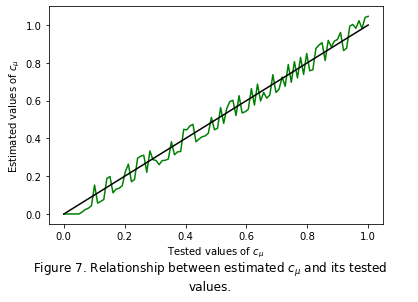

In [4]:
# Function to estimate the ML set of parameters:
def gev_ns_mle(x, t, param0, bounds):
    
    # Using the optimization package scipy.optimize.minimize()
    out = minimize(gev_ns_log_likelihood, params0, args=(x,t), method='Nelder-Mead', bounds=bounds)
    
    # Return likelihood value, cmu, mu0, sigma, xi
    return out['fun'],out['x'][0],out['x'][1],out['x'][2],out['x'][3]
#
# Main part (just make sure it's different from functions)
#            
if __name__=="__main__":
    
    # Initial guesses for the nonstationary GEV distribution parameters
    params0 = [cmu, mu0, sigma, xi]
    
    # The boundary of parameters that we want to test
    scale = 100
    bounds = [(cmu/scale,cmu*scale),(mu0-scale,mu0+scale),(sigma/scale,sigma*scale),(xi/scale,xi*scale)]
    
    # Use this functions to estimate parameters
    mle, cmu_o, mu0_o, sigma_o, xi_o = gev_ns_mle(x, t, params0, bounds)
    
    # Verify that this function works as expected
    
    # Generate samples for a range of cμ values
    cmu_r = np.linspace(0,1,100)  # Test with N=1000 is very slow !
    # Array to save estimated cμ
    cmu_e = np.zeros_like(cmu_r)
    
    # Loop for each cμ 
    for i in np.arange(len(cmu_r)) :
        # Use function gev_ns_samples to get the sample
        x_tmp,q_tmp = gev_ns_samples(t, cmu_r[i], mu0, sigma, xi)
        
        # Initial guesses for the nonstationary GEV distribution parameters
        params0 = [cmu_r[i], mu0, sigma, xi]
    
        # The boundary of parameters that we want to test
        bounds = [(cmu_r[i]/scale,cmu_r[i]*scale),(mu0-scale,mu0+scale),(sigma/scale,sigma*scale),(xi/scale,xi*scale)]
    
        # Use this functions to estimate parameters
        mle, cmu_o, mu0_o, sigma_o, xi_o = gev_ns_mle(x_tmp, t, params0, bounds)
    
        # Save my estimated cμ
        cmu_e[i] = cmu_o
        
    # Show my estimated cμ values versus their calculated values
    plt.plot(cmu_r,cmu_e,c='g')
    # Add 1:1 line
    plt.plot(cmu_r,cmu_r, c='k')
      
    plt.xlabel('Tested values of $c_{\u03BC}$')
    plt.ylabel('Estimated values of $c_{\u03BC}$')
    
    caption='Figure 7. Relationship between estimated $c_{\u03BC}$ and its tested values.'
    plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    
    # Relative error : result is ~7.4 %
    #print (np.nanmean(100*(cmu_e-cmu_r)/cmu_r))

**Discussion** 

To verify that the maximum likelihood estimate (MLE) function works as expected, I generate samples for a range of $c_{\mu}$ values and use the MLE function to estimate $c_{\mu}$ from these samples. 
**Figure 7** shows the estimated $c_{\mu}$ values versus their tested values.
A range of 100 values of $c_{\mu}$ is tested (noted that the test for 1000 values is very slow).
It can be seen that the estimated $c_{\mu}$ values vary close to the tested $c_{\mu}$ values.
Certainly, I expect the result follow the 1:1 relationship line (i.e., black line in Figure 7).
But the results are just "good enough" (as shown by green line in Figure 7) when some estimated $c_{\mu}$ values are overestimated and some are underestimated.
The relative error of estimated $c_{\mu}$ in this test is about 7.4%.

The Nelder-Mead algorithm which is the first option for solvers of optimization package *scipy.optimize.minimize()* is used for my *gev_ns_mle()* function [[3]](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method).
Other solvers should be tested in the future as well as more tests should be carried out to understand current solver, because the Nelder-Mead algorithm *"can converge to non-stationary points"*.

As following the instruction of problem #2 and #3, I don't need to modify my negative log-likelihood function for this problem. Therefore, I don't need to re-run my tests from Problem 3 above.

Dealing with the issue that ***the GEV distribution’s definition is discontinuous at ξ = 0***:
I have no idea excepted, simply, applying my functions for three different range of $\xi$ values (i.e., <0, =0 and >0). 
This is indeed a method used in Zhang and Shaby (2022).
El Adlouni et al., (2007) suggested using a Beta distribution as prior for the shape parameter in the MLE algorithm.
But, so far, I don't have any modification for my function at this point.

<span style="color:blue; font-size:1.5em"> **5. Use your mle method on the data from hw2** (20 points)  </span>  <br />
* **(1)** Load and plot the csv data in /home/data/risser2019_figure1.csv (the first column is year, the second column is rx7day [mm]; there is a header row). also plot a pdf of the rx7day values.
    * **Figure 8** and **Figure 9** show these plots.

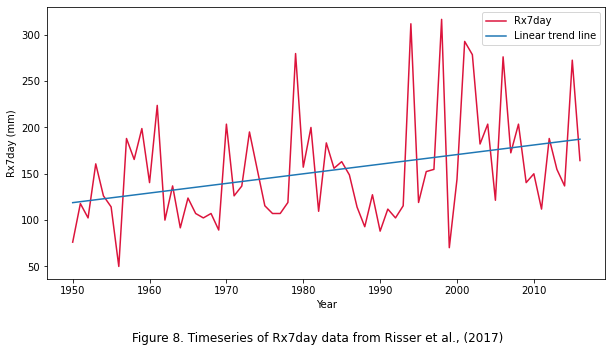

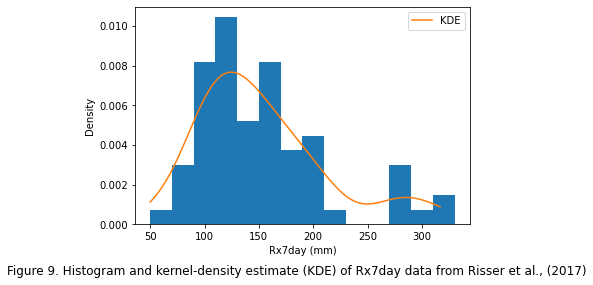

In [5]:
# Load Risser et al., (2017) data
df = pd.read_csv('/home/data/Risser2019_Figure1.csv',header=0)

# Get #Year and #Rx7day as time (t) and variable (x)
t = df['# Year'].values
x = df[' Rx7day'].values

# Try simple linear trendline
z = np.polyfit(t, x, 1)
p = np.poly1d(z)

# Try to add KDE
kde = stats.gaussian_kde(x)
xx = np.linspace(np.nanmin(x), np.nanmax(x), 100)

# Plot the CSV data
plt.figure (figsize=(10,5))
plt.plot(t, x, color='crimson',label='Rx7day')
# Add trendline to plot
plt.plot(t, p(t),label='Linear trend line')
# Decoration
plt.xlabel('Year')
plt.ylabel('Rx7day (mm)')
plt.legend()
caption='Figure 8. Timeseries of Rx7day data from Risser et al., (2017)'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

# Plot a PDF of the Rx7day values
mybins=np.arange(50,340,20)
plt.hist(x, density=True, bins=mybins)
plt.plot(xx, kde(xx), label="KDE")
plt.ylabel('Density')
plt.xlabel('Rx7day (mm)')
plt.legend()
caption='Figure 9. Histogram and kernel-density estimate (KDE) of Rx7day data from Risser et al., (2017)'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

* **(2)** use your maximum likelihood method to estimate the parameters of the non-stationary distribution.
    * The code in cell #14 shows the step for this estimation.
    * The found values are:
        * Likelihood value =  359.80
        * $c_{\mu}$ =  0.0367
        * $\mu_{0}$ =  53.09
        * $\sigma$ =  42.89
        * $\xi$ = 0.055

In [6]:
# Guesstimate the initial guesses
cmu = 0.001           # Start with this assumption
mu0 = np.nanmean(x)   # Using the mean
sigma = np.nanstd(x)  # Using the standard deviation
xi = 0.05

# Initial guesses for the nonstationary GEV distribution parameters
params0 = [cmu, mu0, sigma, xi]
    
# The boundary of parameters that we want to test
scale = 100
bounds = [(cmu/scale,cmu*scale),(mu0-scale,mu0+scale),(sigma/scale,sigma*scale),(xi/scale,xi*scale)]
    
# Use this functions to estimate parameters
mle, cmu_o, mu0_o, sigma_o, xi_o = gev_ns_mle(x, t, params0, bounds)
    
# Print the results
print ("MLE = ",mle, " cmu = ", cmu_o, " mu0 = ", mu0_o, " sigma = ", sigma_o, "xi =", xi_o)

MLE =  359.8047171253626  cmu =  0.036714363648281845  mu0 =  53.090298507462705  sigma =  42.89130102269547 xi = 0.05530854924981232


* **(3)** plot time vs rx7day along with time t vs q(q, t | cμ, μ0, σ, ξ) for q = 0.1, q = 0.5, and q = 0.9 (i.e., plot a timeseries of the quantiles using cμ and the values of μ0, σ, and ξ determined above.)
    * **Figure 10** shows this plot.

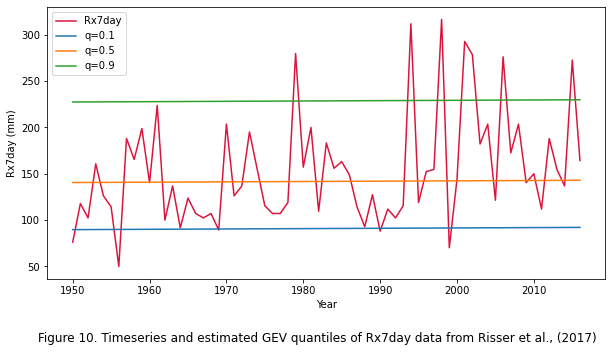

In [7]:
# Used the estimated values
cmu = cmu_o
mu0 = mu0_o
sigma = sigma_o
xi = xi_o

# Get quantiles
q=np.full(len(x),0.1)
q_1=gev_functions.gev_ns_qf(q, t, cmu, mu0, sigma, xi)
q=np.full(len(x),0.5)
q_5=gev_functions.gev_ns_qf(q, t, cmu, mu0, sigma, xi)
q=np.full(len(x),0.9)
q_9=gev_functions.gev_ns_qf(q, t, cmu, mu0, sigma, xi)

# Plot
plt.figure (figsize=(10,5))
plt.plot(t, x, color='crimson',label='Rx7day')
# Add quantiles
plt.plot(t, q_1,label='q=0.1')
plt.plot(t, q_5,label='q=0.5')
plt.plot(t, q_9,label='q=0.9')
# Decoration
plt.xlabel('Year')
plt.ylabel('Rx7day (mm)')
plt.legend()
caption='Figure 10. Timeseries and estimated GEV quantiles of Rx7day data from Risser et al., (2017)'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

* **(4)** calculate the percentage change in μ(t) between 1950 and 2017. how does this compare to the values reported in table 1 of risser et al., and why might it differ?

In [8]:
# Percentage change in μ(t)
mu = ( cmu * t ) + mu0
pc = 100*(mu[-1]-mu[0])/mu[0]
print ("Percentage change of μ(t) = ",pc)

Percentage change of μ(t) =  1.9434421872576104


The percentage of change of $\mu_{t}$ is about 1.9 %.
Firstly, the model M2 that used and presented in Risser et al., (2017) considered the location parameter depends linearly on $ln(CO_{2})$ and Niño3.4 and the log of the scale parameter depends linearly on $ln(CO_{2})$.
In the simple model that we used in this exercise, only location paramater depends linearly on time.
Secondly, as shown in **Figure 11** in Appendix section, the estimated parameters by my function can be "just one of many acceptable answers" as it can be one of many local maximum likelihoods.
In Figure 11, it can be seen that two estimated GEV PDF functions (i.e., green and red lines) with two different set of parameters can both deliver reasonable estimates, as compare with the KDE line.
Maybe we should test the Goodness-of-Fit (e.g., Kolmogorov-Smirnov, or Anderson-Darling) for the estimated parameters.
Finally, the value in Table 1 of Risser et al., (2017) considered the comparison of "return period" not the percentage change in $\mu$. So, we should be careful to compare our results with these values in this Table 1.

<span style="color:blue; font-size:1.2em"> **References**  </span>  <br />
* El Adlouni, S., Ouarda, T.B., Zhang, X., Roy, R. and Bobée, B., 2007. Generalized maximum likelihood estimators for the nonstationary generalized extreme value model. Water Resources Research, 43(3).
* Gilleland, E., & Katz, R. W. 2016. extRemes 2.0: An Extreme Value Analysis Package in R. Journal of Statistical Software, 72(8), 1–39. https://doi.org/10.18637/jss.v072.i08
* Zhang, L. and Shaby, B.A., 2022. Uniqueness and global optimality of the maximum likelihood estimator for the generalized extreme value distribution. Biometrika, 109(3), pp.853-864.

<span style="color:blue; font-size:1.2em"> **Appendix**  </span>  <br />
A plot of estimated PDF to compare with histogram of data from Risser et al., (2017)

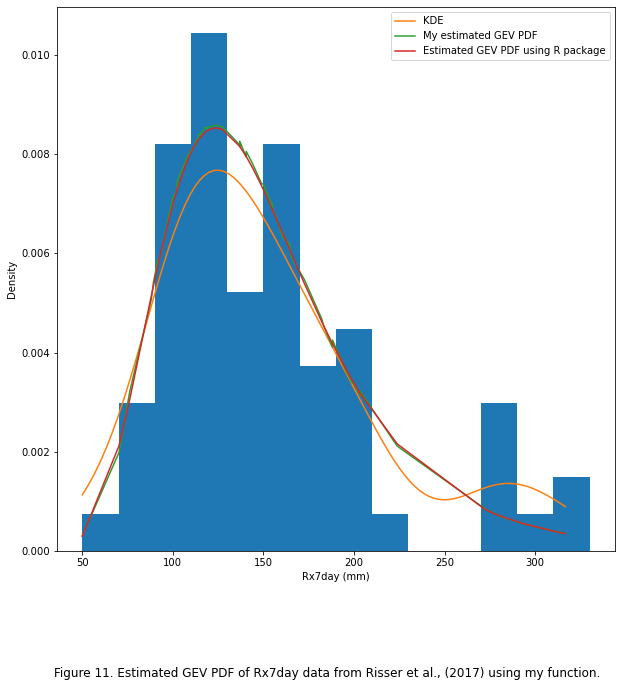

In [9]:
# Using the written function to have estimated PDF
pdf_risser = gev_functions.gev_ns_pdf(x, t, cmu, mu0, sigma, xi) 

# Sort "pdf" for visulizations
pdf_sorted = [x for _,x in sorted(zip(x, pdf_risser))]
x_s = np.sort(x)

# Another parameter set found by R package of Gilleland and Katz (2016)
mu0_a=1.241510e+02
cmu_a=8.491746e-04
sigma_a=4.317655e+01
xi_a=5.290594e-02

# Using the written function to have estimated PDF
pdf_a = gev_functions.gev_ns_pdf(x, t, cmu_a, mu0_a, sigma_a, xi_a) 

# Sort "pdf" for visulizations
pdf_ap = [x for _,x in sorted(zip(x, pdf_a))]

# Now plot it :
mybins=np.arange(50,340,20) # Based on min/max of x

plt.figure (figsize=(10,10))
plt.hist(x, density=True, bins=mybins)
plt.plot(xx, kde(xx), label="KDE")
plt.plot(x_s, pdf_sorted, label="My estimated GEV PDF")
plt.plot(x_s, pdf_ap, label="Estimated GEV PDF using R package")

plt.ylabel('Density')
plt.xlabel('Rx7day (mm)')
plt.legend()
caption='Figure 11. Estimated GEV PDF of Rx7day data from Risser et al., (2017) using my function.'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()